In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.datasets import fashion_mnist

In [0]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

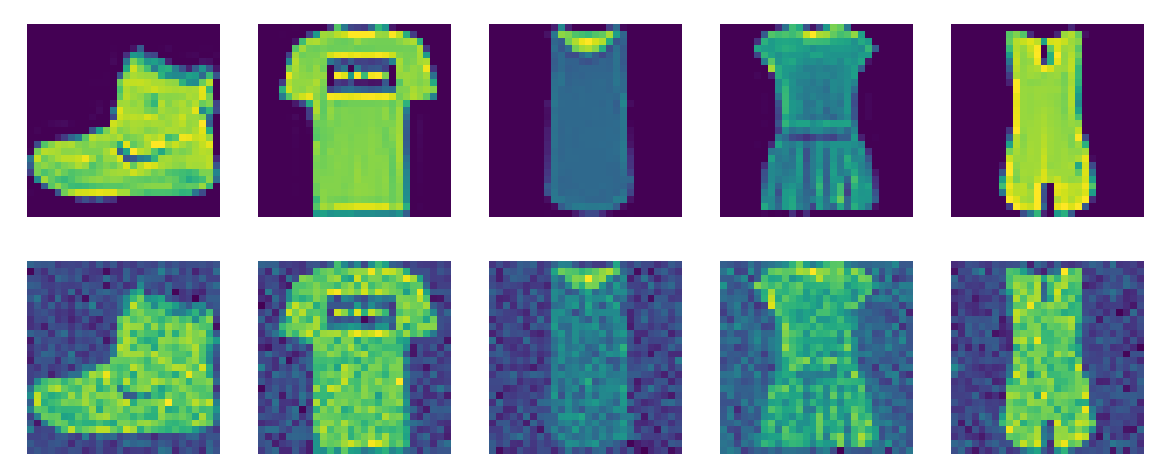

In [3]:
#add some noise
def addNoiseToImages(images, noiseStrengh = 0.1):
    tmpNoise = np.random.normal(0, noiseStrengh, images.shape)
    imgsNoised = images+tmpNoise
    return imgsNoised
  
imgsNum = 5
x_train_noised = addNoiseToImages(x_train, 30)
x_test_noised = addNoiseToImages(x_test, 30)
##output reshaping for reciving photo instead of scallar
#outImgs = out.reshape(-1,28,28)

_,a =plt.subplots(2, imgsNum, figsize=(20,8))

for i in range(imgsNum):
  a[0][i].matshow(x_train[i])
  a[0][i].axis("off")
  a[1][i].matshow(x_train_noised[i])
  a[1][i].axis("off")

In [0]:
## input data reshaping
x_train_2 = x_train.reshape(-1,784)
x_train_noised_2 = x_train_noised.reshape(-1,784)

x_test_2 = x_test.reshape(-1,784)
x_test_noised_2 = x_test_noised.reshape(-1,784)

In [0]:
### Convolution Net autoencoder

In [11]:
model = models.Sequential()

#Reshaping layer to match concolution layer input requirements
model.add(layers.Reshape((28,28,1), input_shape=(784,)))

##adding Convolution layers  
model.add(layers.Conv2D(filters=16, kernel_size=(3,3), strides=(2,2), padding="same", data_format="channels_last", activation="relu"))
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), strides=(2,2), padding="same", data_format="channels_last", activation="relu"))
model.add(layers.Flatten())
#coding layers#
model.add(layers.Dense(256, activation="relu", name="coded"))
##reshaing ->going up with conv layers
model.add(layers.Dense(1568, activation="relu")) ##1568 -> tyle samo co flatten
##reshape
model.add(layers.Reshape((7,7,32))) ## rozmiar po pierwszej konwolucji -> patrz w summary
##convolution transpose going up
model.add(layers.Conv2DTranspose(filters=16, kernel_size=(3,3), strides=(2,2), padding="same", data_format="channels_last", activation="relu"))
model.add(layers.Conv2DTranspose(filters=1, kernel_size=(3,3), strides=(2,2), padding="same", data_format="channels_last", activation="relu")) ## filters=1 oznacza ze schodzimy na jedno zdjecie

##Reshape last layer
model.add(layers.Reshape((784,))) ##input size, wracamy do wielkosci wsadu!!


model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 7, 7, 32)          4640      
_________________________________________________________________
flatten_1 (Flatten)          (None, 1568)              0         
_________________________________________________________________
coded (Dense)                (None, 256)               401664    
_________________________________________________________________
dense_1 (Dense)              (None, 1568)              402976    
_________________________________________________________________
reshape_4 (Reshape)          (None, 7, 7, 32)         

In [12]:
model.compile(optimizer="adam", loss="mse")
history = model.fit(x_train_noised_2, x_train_2, batch_size=300, epochs =20, validation_data=(x_test_noised_2, x_test_2))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 3s 52us/sample - loss: 3650.8713 - val_loss: 1359.0081
Epoch 2/20
60000/60000 [==============================] - 3s 43us/sample - loss: 1069.6298 - val_loss: 891.1693
Epoch 3/20
60000/60000 [==============================] - 2s 41us/sample - loss: 792.2197 - val_loss: 724.9245
Epoch 4/20
60000/60000 [==============================] - 2s 41us/sample - loss: 673.8913 - val_loss: 643.1377
Epoch 5/20
60000/60000 [==============================] - 2s 41us/sample - loss: 604.7914 - val_loss: 584.1585
Epoch 6/20
60000/60000 [==============================] - 2s 40us/sample - loss: 555.0734 - val_loss: 540.2374
Epoch 7/20
60000/60000 [==============================] - 2s 41us/sample - loss: 518.2967 - val_loss: 512.1014
Epoch 8/20
60000/60000 [==============================] - 3s 42us/sample - loss: 490.3248 - val_loss: 483.3774
Epoch 9/20
60000/60000 [==============================] - 2

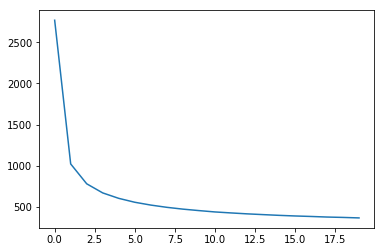

In [8]:
plt.plot(history.history["loss"])

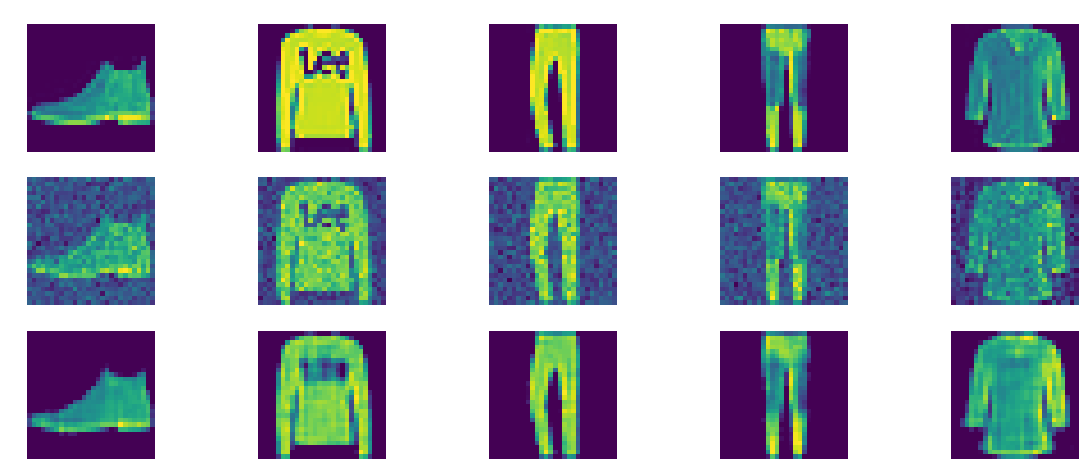

In [9]:
imgsNum = 5
img_denoised= model.predict(x_test_noised_2[:imgsNum])

#output reshaping for reciving photo instead of scallar
outImgs_denoised = img_denoised.reshape(-1,28,28)

_,a =plt.subplots(3, imgsNum, figsize=(20,8))

for i in range(imgsNum):
  a[0][i].matshow(x_test[i])
  a[0][i].axis("off")
  a[1][i].matshow(x_test_noised[i])
  a[1][i].axis("off")
  a[2][i].matshow(outImgs_denoised[i])
  a[2][i].axis("off")